# gpt-3.5-turbo-16k-0613

**User**: Get marketcaps of apple, microsoft, amazon, tesla, nvidia, google and meta using yfinance

In [2]:
import yfinance as yf

tickers = ["AAPL", "MSFT", "AMZN", "TSLA", "NVDA", "GOOGL", "META"]

marketcaps = {}

for ticker in tickers:
    ticker_info = yf.Ticker(ticker)
    marketcap = ticker_info.info["marketCap"]
    marketcaps[ticker] = marketcap

marketcaps

{'AAPL': 3047278510080,
 'MSFT': 2601194618880,
 'AMZN': 1324822822912,
 'TSLA': 850766659584,
 'NVDA': 1134819409920,
 'GOOGL': 1549306298368,
 'META': 758029942784}

**User**: Get last closing price of those companies.

In [3]:
import yfinance as yf

tickers = ["AAPL", "MSFT", "AMZN", "TSLA", "NVDA", "GOOGL", "META"]

closing_prices = {}

for ticker in tickers:
    ticker_info = yf.Ticker(ticker)
    history = ticker_info.history(period="1d")
    last_close = history["Close"].iloc[-1]
    closing_prices[ticker] = last_close

closing_prices

{'AAPL': 193.7454071044922,
 'MSFT': 349.82708740234375,
 'AMZN': 129.11000061035156,
 'TSLA': 268.4200134277344,
 'NVDA': 459.2880859375,
 'GOOGL': 121.86000061035156,
 'META': 295.7254943847656}

**User**: Estimate shares outstanding

In [4]:
shares_outstanding = {}

for ticker in tickers:
    marketcap = marketcaps[ticker]
    last_close = closing_prices[ticker]
    shares_outstanding[ticker] = marketcap / last_close

shares_outstanding

{'AAPL': 15728261926.934452,
 'MSFT': 7435658108.110735,
 'AMZN': 10261194459.368477,
 'TSLA': 3169535120.4244256,
 'NVDA': 2470822659.3851304,
 'GOOGL': 12713821521.484484,
 'META': 2563289121.7614617}

**User**: Draw 4-year history of marketcap of those companies.

[*********************100%***********************]  7 of 7 completed


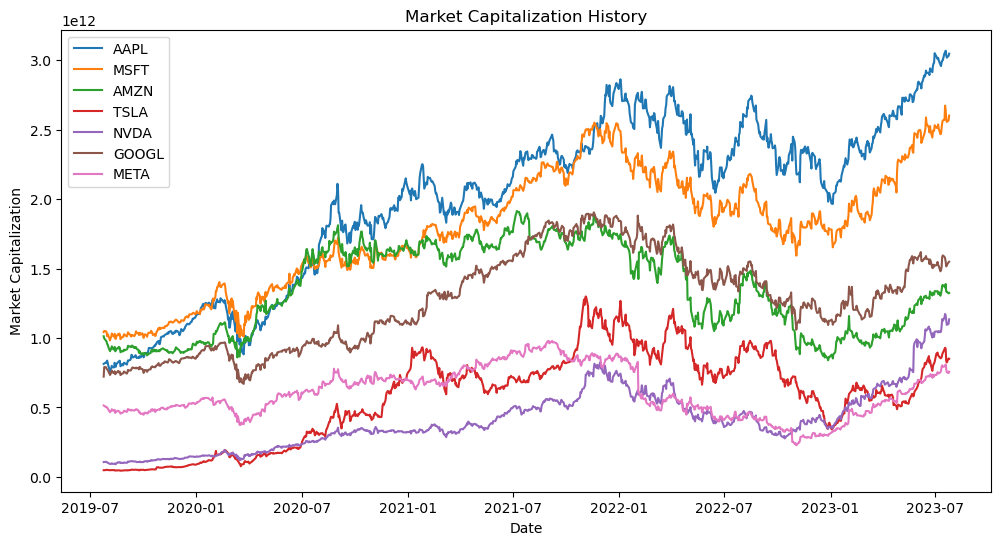

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

tickers = ["AAPL", "MSFT", "AMZN", "TSLA", "NVDA", "GOOGL", "META"]

# Get the historical data for 4 years
history = yf.download(tickers, period="4y")["Close"]

# Multiply shares outstanding by closing price for each date
marketcap_history = pd.DataFrame(index=history.index)

for ticker in tickers:
    shares_outstanding_ticker = shares_outstanding[ticker]
    marketcap_history[ticker] = history[ticker] * shares_outstanding_ticker

# Plot the market capitalization history
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(marketcap_history.index, marketcap_history[ticker], label=ticker)

plt.title("Market Capitalization History")
plt.xlabel("Date")
plt.ylabel("Market Capitalization")
plt.legend()
plt.show()